Final cost: 1.1947898109836605e-06
Parameters (θ0, θ1): [0.9966201 0.0013402]


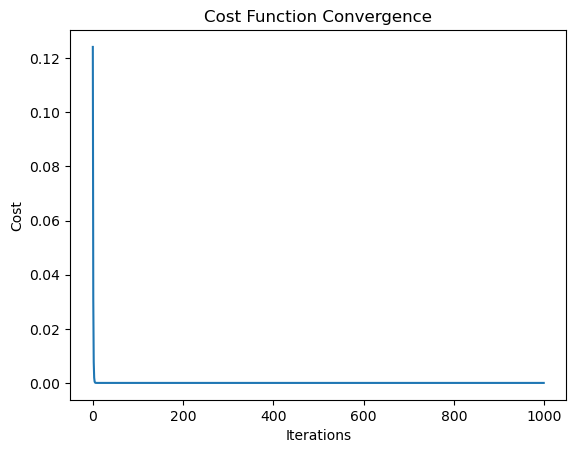

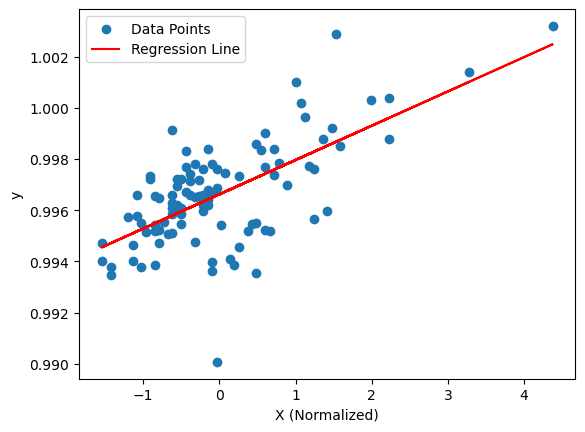

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

independent_url = r"C:\Users\ANKIT SINGH\Downloads\linearX.csv"
dependent_url = r"C:\Users\ANKIT SINGH\Downloads\linearY.csv"


X = pd.read_csv(independent_url, header=None).values
y = pd.read_csv(dependent_url, header=None).values

# Ensure X and y are numpy arrays and reshape
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

# Normalize the data (optional but recommended for gradient descent)
X = (X - np.mean(X)) / np.std(X)

# Add intercept term to X
X = np.hstack((np.ones((X.shape[0], 1)), X))  # Add a column of ones for θ0

# Initialize parameters
theta = np.zeros((2, 1))  # Two parameters: θ0 and θ1
m = len(y)  # Number of training examples
learning_rate = 0.5
num_iterations = 1000

# Cost function
def compute_cost(X, y, theta):
    predictions = X @ theta
    errors = predictions - y
    cost = (1 / (2 * m)) * np.sum(errors**2)
    return cost

# Gradient Descent
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    cost_history = []
    for i in range(num_iterations):
        predictions = X @ theta
        errors = predictions - y
        gradients = (1 / m) * (X.T @ errors)
        theta -= learning_rate * gradients
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

# Train the model
theta, cost_history = gradient_descent(X, y, theta, learning_rate, num_iterations)

# Print final parameters and cost
final_cost = compute_cost(X, y, theta)
print(f"Final cost: {final_cost}")
print(f"Parameters (θ0, θ1): {theta.flatten()}")

# Plot cost function convergence
plt.plot(cost_history)
plt.title("Cost Function Convergence")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

# Plot regression line
plt.scatter(X[:, 1], y, label="Data Points")
plt.plot(X[:, 1], X @ theta, color="red", label="Regression Line")
plt.xlabel("X (Normalized)")
plt.ylabel("y")
plt.legend()
plt.show()

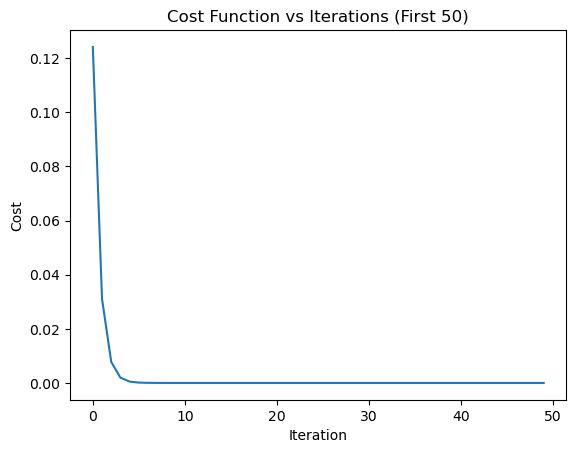

In [33]:
# Plot cost function vs iterations for the first 50 iterations
plt.plot(range(50), cost_history[:50])
plt.title("Cost Function vs Iterations (First 50)")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()


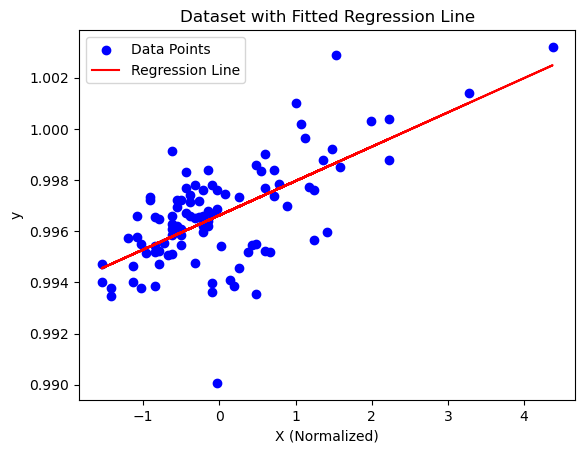

In [35]:
# Plot the dataset and the regression line
plt.scatter(X[:, 1], y, label="Data Points", color="blue")
plt.plot(X[:, 1], X @ theta, color="red", label="Regression Line")
plt.title("Dataset with Fitted Regression Line")
plt.xlabel("X (Normalized)")
plt.ylabel("y")
plt.legend()
plt.show()


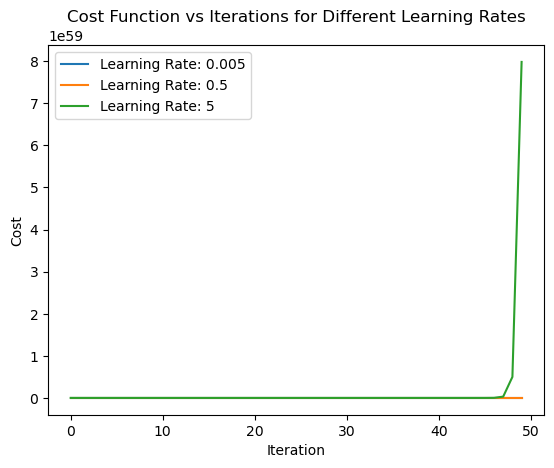

In [37]:
learning_rates = [0.005, 0.5, 5]

for lr in learning_rates:
    theta = np.zeros((2, 1))  # Reset theta for each test
    theta, cost_history = gradient_descent(X, y, theta, lr, num_iterations=50)
    plt.plot(range(50), cost_history, label=f"Learning Rate: {lr}")

plt.title("Cost Function vs Iterations for Different Learning Rates")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.show()


In [39]:
def stochastic_gradient_descent(X, y, theta, learning_rate, num_iterations):
    cost_history = []
    for i in range(num_iterations):
        for j in range(m):  # Loop over each example
            random_index = np.random.randint(0, m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = xi.T @ (xi @ theta - yi)
            theta -= learning_rate * gradients
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history


In [42]:
def mini_batch_gradient_descent(X, y, theta, learning_rate, num_iterations, batch_size=20):
    cost_history = []
    for i in range(num_iterations):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        for j in range(0, m, batch_size):
            xi = X_shuffled[j:j+batch_size]
            yi = y_shuffled[j:j+batch_size]
            gradients = xi.T @ (xi @ theta - yi)
            theta -= learning_rate * gradients
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history


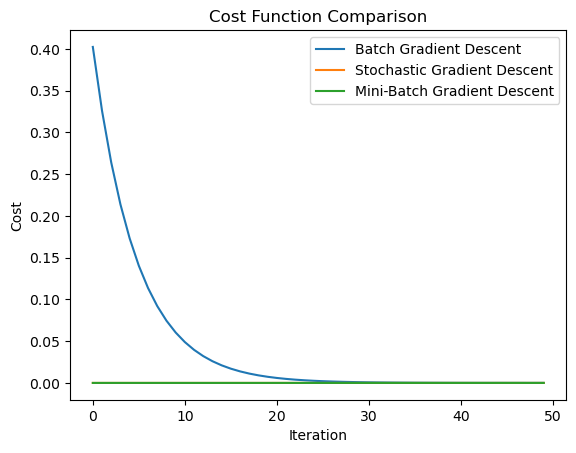

In [44]:
# Parameters
learning_rate = 0.1
num_iterations = 50

# Batch Gradient Descent
theta = np.zeros((2, 1))
theta_batch, cost_batch = gradient_descent(X, y, theta, learning_rate, num_iterations)

# Stochastic Gradient Descent
theta_sgd, cost_sgd = stochastic_gradient_descent(X, y, theta, learning_rate, num_iterations)

# Mini-Batch Gradient Descent
theta_minibatch, cost_minibatch = mini_batch_gradient_descent(X, y, theta, learning_rate, num_iterations)

# Plot the cost function for all methods
plt.plot(range(num_iterations), cost_batch, label="Batch Gradient Descent")
plt.plot(range(num_iterations), cost_sgd, label="Stochastic Gradient Descent")
plt.plot(range(num_iterations), cost_minibatch, label="Mini-Batch Gradient Descent")
plt.title("Cost Function Comparison")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.show()
